In [243]:
#import packages
from statsbombpy import sb
import pandas as pd


In [244]:
competitions_and_seasons = [
(11, 27, "2015/16 La Liga"),
(9, 27, "2015/16 Bundesliga"),
(2, 27, "2015/16 Premier League"),
(12, 27, "2015/16 Serie A"),
(7, 27, "2015/16 Ligue 1"),
(43, 106, "FIFA World Cup 22"),
(43, 3, "FIFA World Cup 18"),
(55, 282, "Euro 2024"),
(55, 43, "Euro 2020")  
]


önce bir lig için oyuncuların şu istatistiklerini toparla:
- pas sayısı
- pas başarı yüzdesi
- pasın kale doğrultusundaki mesafesi
- gole yol açan pas oranı
- şuta yol açan pas oranı
- 3.alana atılan pas miktarı
- pastan sonra oluşan şutun xgsi
- ceza sahasına atılan paslar

sonra bunu bütün ligler için yap ve de tableu atıp görseleştir

In [245]:
#laliga for döngüsü ile hepsini alıcaz
matches = sb.matches(competition_id=11, season_id=27)
matches.head(5)


/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3825848,2015-09-23,20:00:00.000,Spain - La Liga,2015/2016,Levante UD,Eibar,2,2,available,...,None,5,Regular Season,Estadio Ciudad de Valencia,NaN,Luis Lucas Alcaraz González,José Luis Mendilibar Etxebarria,1.1.0,2,2
1,3825895,2015-09-23,22:00:00.000,Spain - La Liga,2015/2016,Las Palmas,Sevilla,2,0,available,...,None,5,Regular Season,Estadio de Gran Canaria,Carlos del Cerro Grande,Francisco Herrera Lorenzo,Unai Emery Etxegoien,1.1.0,2,2
2,3825894,2016-05-01,18:15:00.000,Spain - La Liga,2015/2016,RC Deportivo La Coruña,Getafe,0,2,available,...,None,36,Regular Season,Estadio Abanca-Riazor,Carlos Clos Gómez,Víctor Sánchez del Amo,Juan Eduardo Esnáider Belén,1.1.0,2,2
3,3825855,2016-05-02,20:30:00.000,Spain - La Liga,2015/2016,Málaga,Levante UD,3,1,available,...,None,36,Regular Season,Estadio La Rosaleda,Iñaki Bikandi Garrido,Javier Gracia Carlos,Joan Francesc Ferrer Sicilia,1.1.0,2,2
4,3825908,2016-05-15,19:00:00.000,Spain - La Liga,2015/2016,Espanyol,Eibar,4,2,available,...,None,38,Regular Season,RCDE Stadium,Mario Melero López,Constantin Gâlcă,José Luis Mendilibar Etxebarria,1.1.0,2,2


In [246]:
events_extra_info = matches[["match_id","season","competition","home_team","away_team","referee"]]
events_extra_info

,match_id,season,competition,home_team,away_team,referee
0,3825848,2015/2016,Spain - La Liga,Levante UD,Eibar,NaN
1,3825895,2015/2016,Spain - La Liga,Las Palmas,Sevilla,Carlos del Cerro Grande
2,3825894,2015/2016,Spain - La Liga,RC Deportivo La Coruña,Getafe,Carlos Clos Gómez
3,3825855,2015/2016,Spain - La Liga,Málaga,Levante UD,Iñaki Bikandi Garrido
4,3825908,2015/2016,Spain - La Liga,Espanyol,Eibar,Mario Melero López
...,...,...,...,...,...,...
375,266467,2015/2016,Spain - La Liga,Celta Vigo,Barcelona,Alberto Undiano Mallenco
376,267273,2015/2016,Spain - La Liga,Las Palmas,Barcelona,NaN
377,266490,2015/2016,Spain - La Liga,Barcelona,Levante UD,David Fernández Borbalan
378,266254,2015/2016,Spain - La Liga,Barcelona,Celta Vigo,NaN


In [247]:
events_df = sb.events(match_id=3825882)
events_df.columns

/Users/emirysaglam/GitHub/Bitirme/bitirme-venv/lib/python3.9/site-packages/statsbombpy/api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


Index(['bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_height', 'pass_inswinging', 'pass_length'

In [248]:
events_df = events_df.set_index("match_id").join(events_extra_info.set_index("match_id"),how="left", rsuffix='_match').reset_index()
events_df

,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,team,team_id,timestamp,type,under_pressure,season,competition,home_team,away_team,referee
0,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,212,00:00:00.000,Starting XI,NaN,2015/2016,Spain - La Liga,Atlético Madrid,Celta Vigo,David Fernández Borbalan
1,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Celta Vigo,209,00:00:00.000,Starting XI,NaN,2015/2016,Spain - La Liga,Atlético Madrid,Celta Vigo,David Fernández Borbalan
2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,212,00:00:00.000,Half Start,NaN,2015/2016,Spain - La Liga,Atlético Madrid,Celta Vigo,David Fernández Borbalan
3,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Celta Vigo,209,00:00:00.000,Half Start,NaN,2015/2016,Spain - La Liga,Atlético Madrid,Celta Vigo,David Fernández Borbalan
4,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Celta Vigo,209,00:00:00.000,Half Start,NaN,2015/2016,Spain - La Liga,Atlético Madrid,Celta Vigo,David Fernández Borbalan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3811,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,212,00:32:43.979,Bad Behaviour,NaN,2015/2016,Spain - La Liga,Atlético Madrid,Celta Vigo,David Fernández Borbalan
3812,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Atlético Madrid,212,00:35:04.494,Bad Behaviour,NaN,2015/2016,Spain - La Liga,Atlético Madrid,Celta Vigo,David Fernández Borbalan
3813,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Celta Vigo,209,00:35:24.031,Bad Behaviour,NaN,2015/2016,Spain - La Liga,Atlético Madrid,Celta Vigo,David Fernández Borbalan
3814,3825882,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Celta Vigo,209,00:38:13.330,Bad Behaviour,NaN,2015/2016,Spain - La Liga,Atlético Madrid,Celta Vigo,David Fernández Borbalan


In [249]:
#separate start and end locations from coordinates
events_df[['x', 'y']] = events_df['location'].apply(pd.Series)
events_df[['pass_end_x', 'pass_end_y']] = events_df['pass_end_location'].apply(pd.Series)


In [250]:
passes = events_df[(events_df.type=="Pass")]
passes = passes[passes["pass_outcome"] != "Injury Clearance"]
shots_fromPass = events_df[(events_df.type=="Shot")][["player","shot_type","shot_key_pass_id","shot_outcome","shot_statsbomb_xg"]]

In [272]:
events_df[(events_df.type=="Shot")][["player","shot_type","shot_key_pass_id","shot_outcome","shot_statsbomb_xg"]]

,player,shot_type,shot_key_pass_id,shot_outcome,shot_statsbomb_xg
3690,Saúl Ñíguez Esclapez,Open Play,NaN,Saved,0.045746
3691,Diego Roberto Godín Leal,Open Play,e14cd9d3-f5ff-4d20-ab3f-1ebbf4f06635,Post,0.083062
3692,Marcelo Alfonso Díaz Rojas,Open Play,NaN,Blocked,0.042978
3693,Marcelo Alfonso Díaz Rojas,Open Play,NaN,Blocked,0.067184
3694,John Guidetti,Open Play,NaN,Blocked,0.058636
3695,Saúl Ñíguez Esclapez,Open Play,0e429bbc-4694-47b8-896e-e493d012c721,Saved,0.040346
3696,Fabián Ariel Orellana Valenzuela,Open Play,3b3726c6-3867-488d-804d-8868b66f631c,Saved,0.087138
3697,Manuel Agudo Durán,Free Kick,NaN,Saved,0.039078
3698,Fernando José Torres Sanz,Open Play,NaN,Goal,0.165797
3699,Fernando José Torres Sanz,Open Play,c43f8899-41bf-4ec6-a0d4-adf9b68a3f23,Post,0.076876


In [261]:
shots_fromPass["shot_outcome"].unique()

array(['Saved', 'Post', 'Blocked', 'Goal', 'Off T'], dtype=object)

In [251]:
passes_M = passes.set_index("id").join(shots_fromPass.set_index("shot_key_pass_id"),how="left",rsuffix='_shotFromPass')
passes_M.shape

(1085, 102)

In [252]:
for i in passes_M.columns:
    print(i)

match_id
bad_behaviour_card
ball_receipt_outcome
ball_recovery_recovery_failure
block_offensive
carry_end_location
clearance_aerial_won
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_nutmeg
dribble_outcome
dribble_overrun
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_card
foul_committed_offensive
foul_won_advantage
foul_won_defensive
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_technique
goalkeeper_type
index
interception_outcome
location
minute
miscontrol_aerial_won
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_end_location
pass_height
pass_inswinging
pass_length
pass_no_touch
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_straight
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player
player_id
position
possession
possession_team
poss

In [254]:
pd.options.display.max_rows = 90 # this will set limit of columns to 500

passes_M[passes_M.pass_outcome.isna()][["pass_outcome",'x', 'y', 'pass_end_x', 'pass_end_y',
       'player_shotFromPass', 'shot_type_shotFromPass',
       'shot_outcome_shotFromPass', 'shot_statsbomb_xg_shotFromPass']]#??????????????

,pass_outcome,x,y,pass_end_x,pass_end_y,player_shotFromPass,shot_type_shotFromPass,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass
id,,,,,,,,,
a347f358-89cb-4b39-8388-2c7225960978,NaN,60.0,40.0,58.2,40.8,NaN,NaN,NaN,NaN
55330ba9-7a95-4e27-87bc-f60218723e4a,NaN,57.6,39.2,39.2,36.5,NaN,NaN,NaN,NaN
88ed898a-f31d-460e-a161-4234082b379a,NaN,44.0,40.0,86.5,12.5,NaN,NaN,NaN,NaN
ff100cc3-67fc-4f84-af2f-0502fb235ea5,NaN,78.5,48.7,92.7,64.6,NaN,NaN,NaN,NaN
66182bc6-b546-4901-94a1-9c0016105cc6,NaN,97.5,64.6,103.2,36.5,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
6892d2a2-9319-40d1-bde9-fd69a96a344f,NaN,27.9,31.3,35.8,11.5,NaN,NaN,NaN,NaN
6c85ca75-2ee1-4065-8bc2-2117006593a7,NaN,89.0,48.4,103.6,67.4,NaN,NaN,NaN,NaN
afacc587-b396-4a5c-9365-548f4243351a,NaN,95.2,62.3,87.1,46.0,NaN,NaN,NaN,NaN


In [235]:
passes_M[passes_M.pass_outcome.isna()]["shot_outcome_shotFromPass"].unique() #??????????????

array([nan, 'Post', 'Saved', 'Blocked', 'Off T'], dtype=object)

In [274]:
passes_M = passes_M[passes_M["pass_outcome"] != "Injury Clearance"]


In [275]:
passes_M["shot_outcome_shotFromPass"].notna()

id
a347f358-89cb-4b39-8388-2c7225960978    False
55330ba9-7a95-4e27-87bc-f60218723e4a    False
88ed898a-f31d-460e-a161-4234082b379a    False
3b0e9f94-b90b-484d-941a-608560bab675    False
f337944f-b786-4133-b0bf-438f9ca2d908    False
                                        ...  
6c85ca75-2ee1-4065-8bc2-2117006593a7    False
e9ce1436-2500-417f-9c18-ee113e271a58    False
afacc587-b396-4a5c-9365-548f4243351a    False
f17881da-7dad-4700-b03c-94af55cc6284    False
59b20849-3832-48ad-abd9-9fc1914710c2     True
Name: shot_outcome_shotFromPass, Length: 1085, dtype: bool

In [276]:
# Identify passes 
passes_M["pass_succes"] = passes_M.pass_outcome.isna()

# Make a copy of the original DataFrame to work with
passes_M["f3rd_pass"] = (passes_M.x < 80) & (passes_M.pass_end_x > 80)

# Calculate pass progression
passes_M["pass_progression"] = passes_M["x"] - passes_M["pass_end_x"]
passes_M["pass_progression"].loc[passes_M.pass_outcome.notna()] = None

# Identify shot-assisted passes
passes_M["shot_assisted_pass"] = passes_M.pass_outcome.isna() &  passes_M["shot_outcome_shotFromPass"].notna()


# Identify goal-assisted passes
passes_M["goal_assisted_pass"] = passes_M.pass_outcome.isna() & passes_M["shot_outcome_shotFromPass"] == "Goal"

# Identify crosses (başarılı orta)!!!!!
passes_M["cross"] = (passes_M.pass_cross == True)

# Identify box passes
passes_M["box_pass"] = (
    (passes_M.x < 102)
    & ((passes_M.y < 18) | (passes_M.y > 62))
    & (passes_M.pass_end_x > 102)
    & ((passes_M.pass_end_y > 18) | (passes_M.pass_end_y < 62))
)



# The updated DataFrame now has all the new columns with boolean values
passes_M

/var/folders/6j/1nsywzcs1v5_6gn_3972hssr0000gn/T/ipykernel_75679/3163359057.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  passes_M["pass_progression"].loc[passes_M.pass_outcome.notna()] = None
/var/folders/6j/1nsywzcs1v5_6gn_3972hssr00

,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,shot_type_shotFromPass,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass,pass_succes,f3rd_pass,pass_progression,shot_assisted_pass,goal_assisted_pass,cross,box_pass
id,,,,,,,,,,,,,,,,,,,,,
a347f358-89cb-4b39-8388-2c7225960978,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,1.8,False,False,False,False
55330ba9-7a95-4e27-87bc-f60218723e4a,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,18.4,False,False,False,False
88ed898a-f31d-460e-a161-4234082b379a,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,True,-42.5,False,False,False,False
3b0e9f94-b90b-484d-941a-608560bab675,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,NaN,False,False,False,False
f337944f-b786-4133-b0bf-438f9ca2d908,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,NaN,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6c85ca75-2ee1-4065-8bc2-2117006593a7,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,-14.6,False,False,False,False
e9ce1436-2500-417f-9c18-ee113e271a58,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,False,False,NaN,False,False,True,True
afacc587-b396-4a5c-9365-548f4243351a,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,True,False,8.1,False,False,False,False


<Axes: >

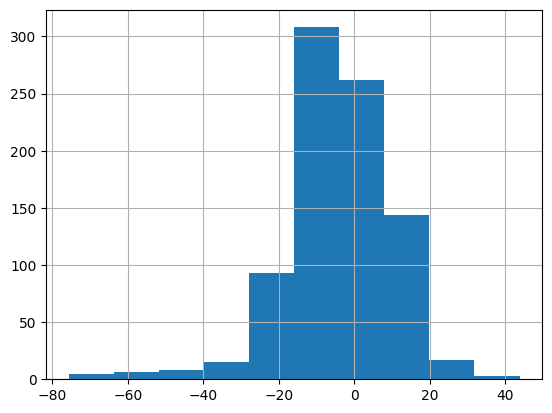

In [277]:
passes_M["pass_progression"].hist()

In [278]:
for i in passes_M.columns:
    print(i)

match_id
bad_behaviour_card
ball_receipt_outcome
ball_recovery_recovery_failure
block_offensive
carry_end_location
clearance_aerial_won
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_nutmeg
dribble_outcome
dribble_overrun
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_card
foul_committed_offensive
foul_won_advantage
foul_won_defensive
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_technique
goalkeeper_type
index
interception_outcome
location
minute
miscontrol_aerial_won
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_end_location
pass_height
pass_inswinging
pass_length
pass_no_touch
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_straight
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player
player_id
position
possession
possession_team
poss

In [279]:
passes_M["player"]

id
a347f358-89cb-4b39-8388-2c7225960978             Antoine Griezmann
55330ba9-7a95-4e27-87bc-f60218723e4a     Fernando José Torres Sanz
88ed898a-f31d-460e-a161-4234082b379a      Augusto Matías Fernández
3b0e9f94-b90b-484d-941a-608560bab675          Saúl Ñíguez Esclapez
f337944f-b786-4133-b0bf-438f9ca2d908              Sergi Gómez Solà
                                                   ...            
6c85ca75-2ee1-4065-8bc2-2117006593a7    Marcelo Alfonso Díaz Rojas
e9ce1436-2500-417f-9c18-ee113e271a58             Iago Aspas Juncal
afacc587-b396-4a5c-9365-548f4243351a             Iago Aspas Juncal
f17881da-7dad-4700-b03c-94af55cc6284    Marcelo Alfonso Díaz Rojas
59b20849-3832-48ad-abd9-9fc1914710c2    Jorge Resurrección Merodio
Name: player, Length: 1085, dtype: object

In [280]:
columns_to_use = [ 
    'type',
    'x',
    'y',
    'pass_end_x',
    'pass_end_y',
    'shot_outcome_shotFromPass',
    'shot_statsbomb_xg_shotFromPass',
    'pass_succes',
    'f3rd_pass',
    'pass_progression',
    'shot_assisted_pass',
    'goal_assisted_pass',
    'cross',
    'box_pass',
]

passes_M[passes_M["player"]=="Antoine Griezmann"][columns_to_use]


,type,x,y,pass_end_x,pass_end_y,shot_outcome_shotFromPass,shot_statsbomb_xg_shotFromPass,pass_succes,f3rd_pass,pass_progression,shot_assisted_pass,goal_assisted_pass,cross,box_pass
id,,,,,,,,,,,,,,
a347f358-89cb-4b39-8388-2c7225960978,Pass,60.0,40.0,58.2,40.8,NaN,NaN,True,False,1.8,False,False,False,False
65a13107-119c-45a7-8705-4122eba819f0,Pass,101.8,34.8,103.2,43.1,NaN,NaN,True,False,-1.4,False,False,False,False
533f8c19-788c-4f92-b72b-829e29012683,Pass,44.0,14.8,30.0,13.6,NaN,NaN,True,False,14.0,False,False,False,False
3b306138-2ac9-4a00-bd54-b8ad5847db95,Pass,59.0,9.9,47.4,6.3,NaN,NaN,True,False,11.6,False,False,False,False
1100b8a0-bee0-473c-8632-9c8f31f2a417,Pass,62.6,21.5,59.9,32.3,NaN,NaN,True,False,2.7,False,False,False,False
6ac7ce42-c300-46f2-81e0-352a786dfd54,Pass,72.3,10.2,67.5,11.0,NaN,NaN,False,False,NaN,False,False,False,False
623283ae-c40a-4044-9995-349d1296b5bb,Pass,68.7,8.7,62.6,4.6,NaN,NaN,True,False,6.1,False,False,False,False
e1ce4ce6-592b-48ce-a4c5-7d74b2f51b73,Pass,72.3,32.8,64.4,34.3,NaN,NaN,True,False,7.9,False,False,False,False
2e95c808-cb09-4231-9d84-b377d80b9990,Pass,80.6,6.6,69.4,3.9,NaN,NaN,True,False,11.2,False,False,False,False


In [281]:
foul_commited = events_df[(events_df.type=="Foul Committed")][["id","type","player","related_events","foul_committed_advantage","foul_committed_card","x","y"]].set_index("id")
foul_commited

,type,player,related_events,foul_committed_advantage,foul_committed_card,x,y
id,,,,,,,
a6efbf28-5c40-4ca3-bd4b-7b85e745892d,Foul Committed,Sergi Gómez Solà,[4091623f-e56b-4e79-b49c-04341a4d1a0f],NaN,NaN,50.5,30.4
d86f2d8c-7371-4014-a763-79eeff51e457,Foul Committed,Diego Roberto Godín Leal,[252acb07-42c3-4a2c-84ab-4d3686aa9cd2],NaN,NaN,56.7,21.2
5069b75a-78e4-43eb-b0f6-3871d85bb63e,Foul Committed,Jorge Resurrección Merodio,"[3357fdec-0889-4f8c-86d2-e43702fa7a52, add597e...",NaN,NaN,74.6,29.1
9197df70-8034-424b-9aeb-c452f6ed9422,Foul Committed,Marcelo Alfonso Díaz Rojas,"[02187366-ab48-4eb0-b3ff-ba45248cdbc7, 666fa40...",NaN,NaN,39.9,67.3
a54a1a6b-ac94-4702-8f08-144de91fa4fb,Foul Committed,Jonathan Castro Otto,[7bf694ee-064b-4152-8dbe-984dd4a5e23b],NaN,NaN,48.9,53.4
97f3beef-4789-49f1-abe2-9fadc947be73,Foul Committed,Manuel Agudo Durán,"[36f6a22b-647f-47d4-9f15-4c70c4bf3614, 97d7574...",NaN,NaN,56.6,14.4
8c005c0d-a5c5-484e-bd4c-b472b475c1e7,Foul Committed,Jorge Resurrección Merodio,[c81d2d40-726a-4e19-9cb4-2cede1dd5fd5],NaN,NaN,86.1,47.1
d6506f27-60e4-4c6a-96f0-acc8b2d47972,Foul Committed,Juan Francisco Torres Belén,[726b7b7c-ce53-453b-8afa-fa389279e403],NaN,NaN,82.7,73.6
f941941f-9fa0-4a96-b189-fbca7d94b308,Foul Committed,Stefan Savić,[b9f43cb0-5da7-45c0-9894-69dbeec09b58],NaN,NaN,48.5,74.0


In [282]:
fouls = events_df[(events_df.type=="Foul Won")]
#fouls

In [297]:
fouls = fouls.explode("related_events")
fouls.columns

Index(['match_id', 'bad_behaviour_card', 'ball_receipt_outcome',
       'ball_recovery_recovery_failure', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_offensive', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_end_location',
       'pass_height', 'pass_inswinging', 'pass_length'

In [284]:
fouls_M = fouls.set_index("related_events").join(foul_commited,how="left", rsuffix='_foul_commitedJ')
fouls_M = fouls_M[fouls_M["player_foul_commitedJ"].notna()]
fouls_M

,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,y,pass_end_x,pass_end_y,type_foul_commitedJ,player_foul_commitedJ,related_events,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ
related_events,,,,,,,,,,,,,,,,,,,,,
a6efbf28-5c40-4ca3-bd4b-7b85e745892d,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.7,NaN,NaN,Foul Committed,Sergi Gómez Solà,[4091623f-e56b-4e79-b49c-04341a4d1a0f],NaN,NaN,50.5,30.4
d86f2d8c-7371-4014-a763-79eeff51e457,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.9,NaN,NaN,Foul Committed,Diego Roberto Godín Leal,[252acb07-42c3-4a2c-84ab-4d3686aa9cd2],NaN,NaN,56.7,21.2
5069b75a-78e4-43eb-b0f6-3871d85bb63e,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,NaN,NaN,Foul Committed,Jorge Resurrección Merodio,"[3357fdec-0889-4f8c-86d2-e43702fa7a52, add597e...",NaN,NaN,74.6,29.1
9197df70-8034-424b-9aeb-c452f6ed9422,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.8,NaN,NaN,Foul Committed,Marcelo Alfonso Díaz Rojas,"[02187366-ab48-4eb0-b3ff-ba45248cdbc7, 666fa40...",NaN,NaN,39.9,67.3
a54a1a6b-ac94-4702-8f08-144de91fa4fb,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.7,NaN,NaN,Foul Committed,Jonathan Castro Otto,[7bf694ee-064b-4152-8dbe-984dd4a5e23b],NaN,NaN,48.9,53.4
97f3beef-4789-49f1-abe2-9fadc947be73,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.7,NaN,NaN,Foul Committed,Manuel Agudo Durán,"[36f6a22b-647f-47d4-9f15-4c70c4bf3614, 97d7574...",NaN,NaN,56.6,14.4
8c005c0d-a5c5-484e-bd4c-b472b475c1e7,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,NaN,NaN,Foul Committed,Jorge Resurrección Merodio,[c81d2d40-726a-4e19-9cb4-2cede1dd5fd5],NaN,NaN,86.1,47.1
d6506f27-60e4-4c6a-96f0-acc8b2d47972,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.5,NaN,NaN,Foul Committed,Juan Francisco Torres Belén,[726b7b7c-ce53-453b-8afa-fa389279e403],NaN,NaN,82.7,73.6
f941941f-9fa0-4a96-b189-fbca7d94b308,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.1,NaN,NaN,Foul Committed,Stefan Savić,[b9f43cb0-5da7-45c0-9894-69dbeec09b58],NaN,NaN,48.5,74.0


In [285]:
fouls_M.set_index("id")

,match_id,bad_behaviour_card,ball_receipt_outcome,ball_recovery_recovery_failure,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,y,pass_end_x,pass_end_y,type_foul_commitedJ,player_foul_commitedJ,related_events,foul_committed_advantage_foul_commitedJ,foul_committed_card_foul_commitedJ,x_foul_commitedJ,y_foul_commitedJ
id,,,,,,,,,,,,,,,,,,,,,
4091623f-e56b-4e79-b49c-04341a4d1a0f,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.7,NaN,NaN,Foul Committed,Sergi Gómez Solà,[4091623f-e56b-4e79-b49c-04341a4d1a0f],NaN,NaN,50.5,30.4
252acb07-42c3-4a2c-84ab-4d3686aa9cd2,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,58.9,NaN,NaN,Foul Committed,Diego Roberto Godín Leal,[252acb07-42c3-4a2c-84ab-4d3686aa9cd2],NaN,NaN,56.7,21.2
add597e6-93ae-4305-845e-1d087e646020,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.0,NaN,NaN,Foul Committed,Jorge Resurrección Merodio,"[3357fdec-0889-4f8c-86d2-e43702fa7a52, add597e...",NaN,NaN,74.6,29.1
02187366-ab48-4eb0-b3ff-ba45248cdbc7,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.8,NaN,NaN,Foul Committed,Marcelo Alfonso Díaz Rojas,"[02187366-ab48-4eb0-b3ff-ba45248cdbc7, 666fa40...",NaN,NaN,39.9,67.3
7bf694ee-064b-4152-8dbe-984dd4a5e23b,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.7,NaN,NaN,Foul Committed,Jonathan Castro Otto,[7bf694ee-064b-4152-8dbe-984dd4a5e23b],NaN,NaN,48.9,53.4
36f6a22b-647f-47d4-9f15-4c70c4bf3614,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.7,NaN,NaN,Foul Committed,Manuel Agudo Durán,"[36f6a22b-647f-47d4-9f15-4c70c4bf3614, 97d7574...",NaN,NaN,56.6,14.4
c81d2d40-726a-4e19-9cb4-2cede1dd5fd5,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,33.0,NaN,NaN,Foul Committed,Jorge Resurrección Merodio,[c81d2d40-726a-4e19-9cb4-2cede1dd5fd5],NaN,NaN,86.1,47.1
726b7b7c-ce53-453b-8afa-fa389279e403,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.5,NaN,NaN,Foul Committed,Juan Francisco Torres Belén,[726b7b7c-ce53-453b-8afa-fa389279e403],NaN,NaN,82.7,73.6
b9f43cb0-5da7-45c0-9894-69dbeec09b58,3825882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.1,NaN,NaN,Foul Committed,Stefan Savić,[b9f43cb0-5da7-45c0-9894-69dbeec09b58],NaN,NaN,48.5,74.0


In [286]:
for i in fouls_M.columns:
    print(i)

match_id
bad_behaviour_card
ball_receipt_outcome
ball_recovery_recovery_failure
block_offensive
carry_end_location
clearance_aerial_won
clearance_body_part
clearance_head
clearance_left_foot
clearance_right_foot
counterpress
dribble_nutmeg
dribble_outcome
dribble_overrun
duel_outcome
duel_type
duration
foul_committed_advantage
foul_committed_card
foul_committed_offensive
foul_won_advantage
foul_won_defensive
goalkeeper_body_part
goalkeeper_end_location
goalkeeper_outcome
goalkeeper_position
goalkeeper_technique
goalkeeper_type
id
index
interception_outcome
location
minute
miscontrol_aerial_won
off_camera
out
pass_aerial_won
pass_angle
pass_assisted_shot_id
pass_body_part
pass_cross
pass_cut_back
pass_end_location
pass_height
pass_inswinging
pass_length
pass_no_touch
pass_outcome
pass_outswinging
pass_recipient
pass_recipient_id
pass_shot_assist
pass_straight
pass_switch
pass_technique
pass_through_ball
pass_type
period
play_pattern
player
player_id
position
possession
possession_team
p

In [287]:
fouls_M[["foul_committed_type","type_foul_commitedJ"]]

KeyError: "['foul_committed_type'] not in index"

In [113]:
passes_M["rowID"] = passes_M.index
fouls_M["rowID"] = fouls_M.index

In [109]:

writer = pd.ExcelWriter("output.xlsx")
passes_M.to_excel(writer, sheet_name = 'passes')
fouls_M.to_excel(writer, sheet_name = 'fouls')
writer.close()




In [ ]:
pd.options.display.max_rows = 90 # this will set limit of columns to 500
print(pd.options.display.max_columns) # <--- this will display your limit
